# Network Analysis with igraph

### What can be represented with networks?

* Anything with nodes and edges
* Interactions on social networking applications (Facebook, Twitter, Instagram, etc.)
* Biology and ecology (ecosystems)
* Transportation: roads, railroad tracks, available flights
* Finance: stock markets, donors for campaigns, etc.
* The internet, as links and webpages


<div>
    <div style="display:inline-block">
        <h> Ecosystem </h>
        <img src="ecosystem.png"  height="500" width="300">
    </div>
    <div style="display:inline-block">
        <h> Social Network </h>
        <img src="social_graph_martingrandjean.png" height="500" width="300">
    </div>
        <div>
        <img src="railroad_lines.jpg">
    </div>
</div>

## Working with igraph

For more information on the installation process, click here: https://github.com/epmarie/network_workshop/blob/master/README.md

We begin by importing igraph, and then importing everything _from_ igraph - we'll use it enough that it's worth importing. We also import pandas so that we can read in data from CSV files, and random so that we can create reproducible graphs.

In [1]:
import pandas as pd
import numpy as np
import random
from igraph import *

## Basic Terminology

### Node/Vertex
Vertices are one of two basic building blocks of network graphs. They usually represent individual entities, such as people, accounts, specific locations, etc. For example, in social networks, a vertex could be one individual account.

### Edge
The second basic building block of network graphs are edges. They represent connections among vertices and can be weighted, directed, either, or neither. For example, in a network graph for an airline, an edge from one airport to another represents a direct flight that airline flies.

### Subgraph
Any subset of a larger graph is aptly called a subgraph. So, any specific group of nodes and edges that belong to a larger network. 

### Degree
Degree is the number of ties a node has to the rest of the community, so the number of edges extending to/from a single vertex. This property is specific to each vertex. For example, if you were looking at Facebook friendship connections, the degree of each vertex (assuming each vertex was one account) would be the number of friends that individual vertex had.

### Walk
A succession of edges going from vertex a to vertex b, where a can equal b (called a “closed” walk), is called a walk.

### Path
A path is a walk where every node and edge is different (no repeating or retracing steps). When you hear path, people are usually referring to the critical path, or the shortest path available. For example, if you were looking at a graph of trains and train stations, a path could represent all the trains you'd have to take to get from Cincinnati to Los Angeles. If you’re looking at a path where a=b, it is called a cycle - this could represent a round-trip airline ticket set.

### Shortest Path
When discussing paths in network analysis, we're mostly concerned with the _shortest_ path. That is, the path from one node to another that crosses the least number of edges (or, in a weighted graph, the path with the lowest weight). Counter-intuitive to the name, there can be many shortest paths for the same pair of vertices: if two paths have the same number of edges (or weights), they are _both_ considered shortest paths for that pair of vertices.

## What information can we study from networks?

### Size
Size refers to the number of edges in a graph. This is a good measure of how many connections exist within a certain graph.

### Order
Order is the number of vertices in a graph. This tells us how many individual nodes/people/accounts/etc we're studying in a given graph.

### Diameter
In network analysis, diameter refers to the longest of the shortest path lengths between pairs of vertices. So, if we were looking at a network graph of airports (with edges representing flights), the diameter would be the longest of the lengths of the flights between any two airports (e.g. Malaga, Spain to Auckland, New Zealand could represent the diameter of this network). 

Here, we look at a small graph we created by hand earlier. We had initialized it by adding a series of vertices, and then by adding our list of edges. When we request a summary, we are given the number of nodes, the number of edges, and any attributes the vertices and edges have. Here, we've given each vertex a label, so we see `+ attr: label (v)` as part of our summary. Then, we ask for the diameter and are given 3. In context, this means that we'd have to cross a maximum of _3 edges_ to get from any one vertex to any other vertex. We then highlight a path whose length is the diameter.

In [2]:
random.seed(49)
exp_df = pd.read_csv('exp.csv')
exp_df

,Source,Target,Color
0,A,B,Black
1,B,C,Orange
2,C,D,Black
3,D,A,Black
4,D,E,Black
5,C,E,Orange
6,B,F,Orange


In [3]:
nodes = list(set(exp_df['Source']).union(set(exp_df['Target'])))

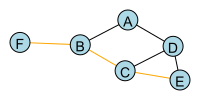

In [4]:
ep = Graph()
ep.add_vertices(nodes)
ep.add_edges(zip(exp_df['Source'], exp_df['Target']))
ep.es['color'] = exp_df['Color']
plot(ep, bbox=(200,100), vertex_color='Light blue',vertex_label=ep.vs["name"])

In [5]:
summary(ep) # -- <#nodes> <#edges> --
ep.diameter()

IGRAPH UN-- 6 7 -- 
+ attr: name (v), color (e)


3

---
Undirected vs. Directed Graphs 
---
### Undirected
* A to B is the same as B to A.
* Example: Friendships on Facebook. If someone is friends with me, I am also friends with them, and those friendships have the same meaning. So, when creating a network graph for who’s-friends-with-whom on Facebook, we would choose an undirected network graph.

Here, we look at a network of dolphin interactions and friendships. Any interaction between two dolphins is assumed to be a mutual friendship, so the edges are not directed. 

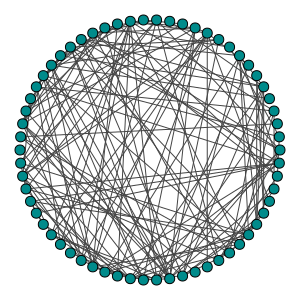

In [6]:
dolphins = read('dolphins/dolphins.gml')
#W. W. Zachary, An information flow model for conflict and fission in small groups, 
#Journal of Anthropological Research 33, 452-473 (1977)
layout = dolphins.layout_circle()
plot(dolphins, layout=layout, vertex_size=10, vertex_label=None, bbox=(300,300), vertex_color="Dark Cyan")

### Directed Graphs
* A to B is not the same as B to A because the direction has meaning
* Example: Twitter follow connections. If I follow someone, it does not mean that they also follow me - the connections are one-way. So, when creating a network graph for who-follows-whom on Twitter, we would want a directed network graph. 

Here, we look at an social network modeling high school friendships. Each node is a student, and an edge means the source student listed the target student as a friend.

In [7]:
friend_csv = pd.read_csv('Friendship-network_data_2013.csv', sep=' ', header=None)
friend = Graph(directed=True)
nodes = list(set(friend_csv[0]).union(set(friend_csv[1])))
friend.add_vertices(nodes)
D = dict(zip(nodes,range(len(nodes))))
friend.add_edges(list(zip([D[v] for v in friend_csv[0]],[D[v] for v in friend_csv[1]])))
friend.es()['arrow_size'] = .7
friend.es()['arrow_width'] = .7

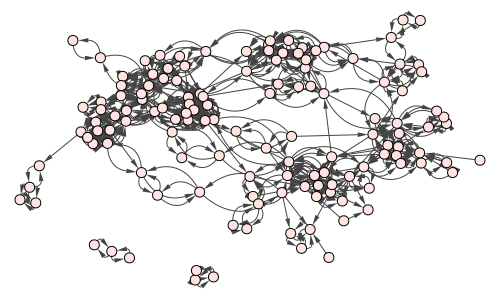

In [8]:
random.seed(68)
plot(friend, vertex_size = 10, bbox=(500,300), vertex_color='Misty Rose')

---
Unweighted vs. Weighted Graphs 
---

### Unweighted
* There is no measurement associated with edges; they simply represent a connection (or lack thereof).
* Example: modeling friendships, predator/prey relationships. The karate network below shows the network of friendships between the 34 members of a karate club at a US university; these connections are unweighted.


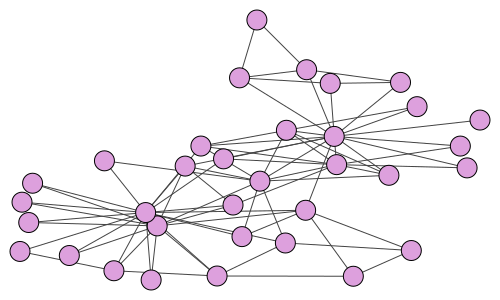

In [9]:
karate = read("karate/karate.gml") # W. W. Zachary, An information flow model for conflict and fission in small groups, 
#Journal of Anthropological Research 33, 452-473 (1977).
plot(karate,bbox=(500,300), vertex_color="Plum")

### Weighted
* In weighted graphs, there is a unit of measurement associated with each edge.
* Example: airline flights, where the unit of measurements is the duration of the flight in hours. Thus, longer flights have higher weights. If we were examining flight time, a weighted network graph could be a nice way to display flights from one location to another.

Here, we look at a network of women, containing the observed attendance at 14 social events by 18 Southern women. The weight represents the number of events that the two women (vertices) attended at the same time.

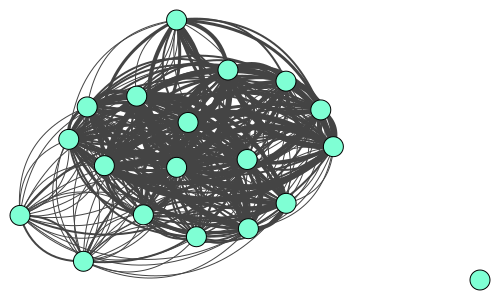

In [10]:
random.seed(1)
sw_df = pd.read_csv('sw_network.csv', sep=' ')
weights = dict()
weights['Weight'] = sw_df['Weight']
sw = Graph(edges=list(zip(sw_df['Source'],sw_df['Target'])), edge_attrs=weights)
layout=sw.layout_kamada_kawai()
plot(sw, edge_width=sw.es()['Weight'], bbox=(500,300), vertex_color="Aquamarine", layout=layout)

# Plotting

The true power of `igraph` lies in its more mathematical capabilities; however, it can still be used for plotting! It uses `cairo` to build its graphs and has a variety of attribute options for plotting nodes and edges.

Let's begin by creating a graph with our own data. This will be a bipartite graph, meaning that the vertices can be divided into two disjoint, independent sets. Here, we model a sorority with attributes for name, year, and whether or not each student has a minor. Our vertices will be names and majors, and those will be the two different sets. We read in data with panads and then eventually move to igraph

When creating graphs in igraph with cairo, the layouts are usually generated randomly. To make these graphs reproducable, we will set a seed before each graph is generated, creating a "controlled randomness" effect.

In [11]:
srat_df = pd.read_csv('srat.csv')
srat_df

,Name,Major,Year,Minor
0,Emma,Chem,3,1
1,Ellen,Data,3,0
2,Anna,Mech,2,1
3,Madison,Chem,1,0
4,Mayme,MatSci,2,0
5,Sydney,IOE,2,0
6,Erica,IOE,3,0
7,Estelle,Mech,3,1
8,Isha,Data,3,1
9,Alexis,CS,3,0


In [12]:
names = list(srat_df['Name'])
majors = list(set(srat_df['Major']))
years = list(srat_df['Year'])
minors = list(srat_df['Minor'])

Here, we create a graph with all the names of the students in the sorority, and we add the `Year` and `Minor` attributes to their respective vertices. Then, we return to the graph and add `majors` to the list of vertices. Since the majors don't have meaningful year and minor attributes, we default both of them to 1.

In [13]:
srat = Graph(directed=False)
srat.add_vertices(names)
srat.add_vertices(majors)

In [14]:
defaults = list([1]*len(majors))
years.extend(defaults)
minors.extend(defaults)
srat.vs['Year'] = years
srat.vs['Minor'] = minors

Now that we have all our vertices, let's go through and add in edges.

In [15]:
srat.add_edges(list(zip(srat_df['Name'], srat_df['Major'])) )

Before we move on to graphing, we create a list of true/false values corresponding to whether or not a vertex is a name. We pass this in as part of our `layout` setup - since this is a bipartite graph, we'll use the bipartite layout, which requires a list explaining what our two sets are.

In [16]:
tfNames= [True]*len(names)
tfMajors = [False]*len(majors)
tfNames.extend(tfMajors)

### Window Size, Node Size and Choosing a Color

This plot looks a little too big (and isn't very aesthetically pleasing). From here, we can set the size of the window using `bbox` and then change the colors of the vertices using `vertex_color`. Also, we can convey information through the size of the vertices. Since one of the attributes of each vertex is year (representing the student's year in school), we can assign larger sizes to students who have been in school longer. We do this by altering the `size` attribute of vertices.

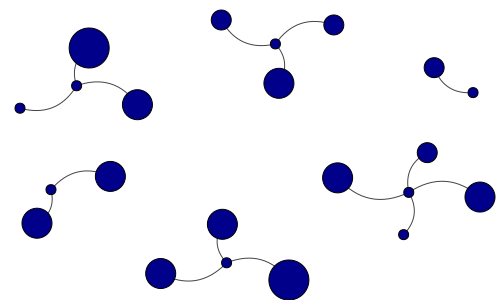

In [17]:
random.seed(123)
srat.vs()["size"] = [v*10 for v in srat.vs()["Year"]]
plot(srat, bbox=(500,300), vertex_color="Dark Blue", edge_curved=True)

### Colors, Labels, and Argument Dictionaries

We can also shift the color of the vertices themselves to represent information. Since we have each the vertices split up into two separate groups, we could emphazie this separation with color. For instance, we could make student vertices light blue and major vertices maroon. We do this by filtering with list comprehesion.

Additionally, we'll add on the vertex labels, passing in the names of the vertices. Instead of having these labels show up on top of the nodes, we'll set the `vertex_label_dist` to 1. Finally, since our styling list is getting pretty long, we can build up a dictionary of all visual styles for our plot, and then pass that dictionary in as an argument to the plotting function.

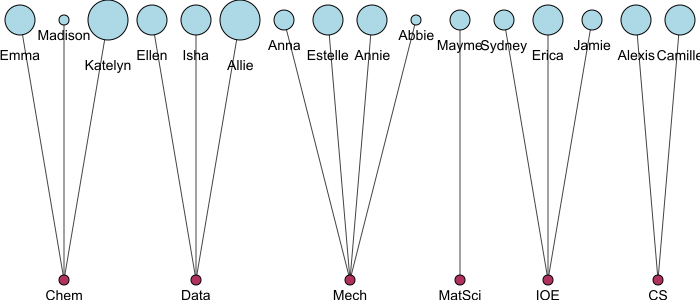

In [18]:
random.seed(123)
vis = {}
vis["vertex_size"] = [v*10 for v in years]
vis["vertex_color"] = ['light blue' if v else 'maroon' for v in tfNames]
vis["bbox"] = (700,300)
vis["vertex_label"] = srat.vs()['name']
vis["vertex_label_dist"] = 2
vis["layout"] = srat.layout_bipartite(types=tfNames)
plot(srat, **vis)

### Edge Width

Though we haven't worked much with edge properties and weighted edges, `igraph` allows us to add attributes to edges just like vertices. Then, just like we did with vertices, we can change the size and color of the edges to demonstrate their respective weights. Here, we assign colors to the edges, using pink to indicate that a student also has an academic minor (and grey otherwise). We then graph accordingly.

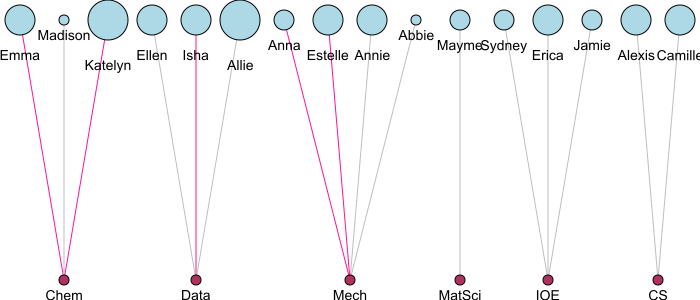

In [19]:
random.seed(123)
color_dict = {True: 'Deep Pink', False: 'Gray'}
vis['edge_color'] = [color_dict[a] for a in srat_df['Minor']]
plot(srat, **vis)

### Additional Options for Graphing
There are many additional arguments and options for graphing in igraph. For more details, visit: http://igraph.org/python/doc/tutorial/tutorial.html#vertex-attributes-controlling-graph-plots

### Saving Plots

Usually, when we make plots or charts, we want to export them to include them in a report, presentation, etc. Luckily, `igraph` has very simply built in the functionality to save these plots just by passing in a filename to the plot function. Currently, plots can be saved as SVG, PDF or PNG images.

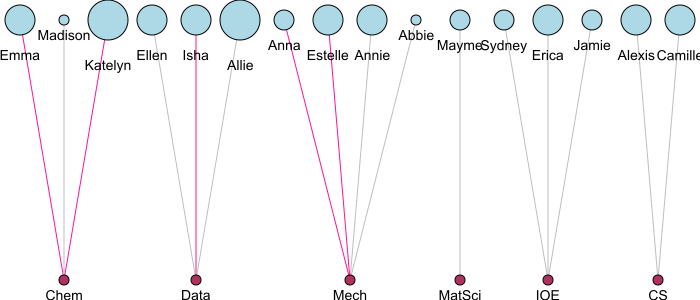

In [20]:
random.seed(123)
plot(srat, "srat.png", **vis)

## Exercise: Plotting

1. Create a graph (from scratch) that looks like a house (five nodes, six edges)
2. Create vertex labels
3. Create edge weights
4. Plot the graph with labels and varying edge widths (don't forget to set a seed!)
5. Change the color of the vertices or edges
6. Bonus points for curving the edges or for finding a seed to set the house straight up

# Centrality

Measures of centrality aim to answer the question of “how important or central is one node to the network?”
This is an essential element of network analysis. When studying social networks, we often try to figure out who (or what account) is most important to some subgraph of the network, or even the network overall. This can provide significant insights as to who has social influence and how one person/account's actions can impact and guide entire social circles. In transportation analysis, centrality measures can be used to identify what should be the busiest stations/locations, and thus can aid in designing facilities that reflect customers' needs.

## Ways of Measuring Centrality

### Degree Centrality
Probably the simplest of all centrality measures, degree centrality assigns centrality measures to vertices based on their degree. Recall from earlier that degree is the number of edges (outgoing edges in directed graphs) from a vertex. Thus, degree centrality will assign the highest measure of centrality to the node with the most edges. In an network showing Facebook friendships, for instance, the person with the most friends would be the vertex with the highest level of degree centrality.

Here, we go back to the dolphin friendship network. If we change the node size to represent the degree of each vertex, we can highlight degree centrality in the graph.

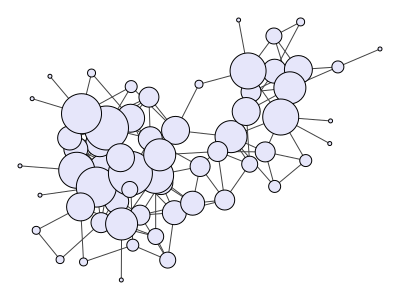

In [22]:
dolphins.degree()
dolphins.vs["size"] = [v*4 for v in dolphins.degree()] # 4 is an arbitrary multiplier for visualization
random.seed(35)
plot(dolphins, bbox=(400,300), vertex_color="Lavender", vertex_label=None)

### Closeness Centrality
The formal definition of closeness centrality is "the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes.” In this case, the vertex with the _lowest_ closeness centrality is the most central vertex. When considering a network showing different train stations and railroad lines connecting them, a node with a high closeness centrality would be a station that provides relatively quick access to all other stations.

Note that taking distances to/from is the same for undirected graphs, but can produce very different results for directed graphs.

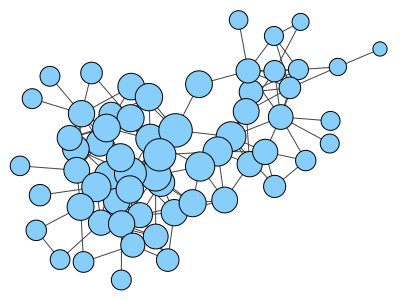

In [23]:
dolphins.vs["size"]=[v*80 for v in dolphins.closeness()]
random.seed(35)
plot(dolphins, bbox=(400,300), vertex_color="Light Sky Blue", vertex_label=None)

### Betweenness Centrality
Perhaps the more computationally complex of the centrality measures listed here, betweenness centrality looks at every pair of vertices, computes the ratio of shortest paths passing through the vertex in question to all shortest paths, and sums these ratios. The algorithm looks like this:

\begin{equation*}
g(v) = \sum_{s\neq v \neq t} \frac{\sigma_{st} (v)}{\sigma_{st}}
\end{equation*}

    1) For each pair of vertices (s, t), compute the shortest paths between them. 
    2) For each pair of vertices (s, t), determine the fraction of shortest paths that pass through the vertex in question (here, vertex v). 
    3) Sum this fraction over all pairs of vertices (s, t)
 

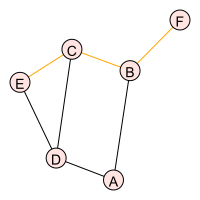

In [24]:
random.seed(34)
plot(ep, bbox=(200,200), vertex_color="Misty Rose", vertex_label=ep.vs()['name'])

Let's walk thorugh calculating the betweenness centrality measure for *C*.

In [27]:
ep.betweenness()

[1.5, 0.0, 3.0, 0.0, 4.5, 1.0]

As we've done with the other measures of centrality, let's change the size of the vertices in the dolphin network to represent each vertex's betweenness centrality measure.

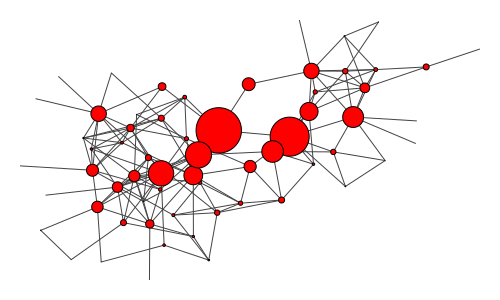

In [28]:
dolphins.vs["size"] = [v/10 for v in dolphins.betweenness()]
random.seed(35)
plot(dolphins, bbox=(500,300), vertex_label=None)

In [29]:
dolphins.vs[dolphins.betweenness().index(max(dolphins.betweenness()))]

igraph.Vertex(<igraph.Graph object at 0x000001C5A6FA9D68>, 36, {'label': 'SN100', 'size': 45.42740687329566, 'id': 36.0})

# PageRank

Think of the internet as one massive directed graph, where each page is a vertex, and a link from one page to another is an edge. Pagerank is the probability of a user ending up on a certain page.


\begin{equation*}
\frac{1-d}{N} + d*\sum_{i=1} \frac{PR(I_i)}{C(I_i)}
\end{equation*}

Where d is a damping factor (usually 0.85), N is the number of vertices in the network, C(Ii) represents the number of outgoing edges (links) from vertex Ii, and PR(Ii) represents the pagerank of vertex  Ii

Computed iteratively: initialize every vertex’s pagerank to 1/N

### Example
Let's go back to the sample graph we used to calculate betweenness centrality and use `igraph` to calculate its pagerank.

In [32]:
ep.pagerank()

[0.20440819112785255,
 0.08686932055996323,
 0.2046697804579824,
 0.1409054252826532,
 0.2183623078586937,
 0.14478497471285476]

Since pagerank can be used as a measure of importance, we look at the dolphin network and change each vertex's size (again) to represent the pagerank score of each individual dolphin. Thus, the graph highlights centrality using pagerank.

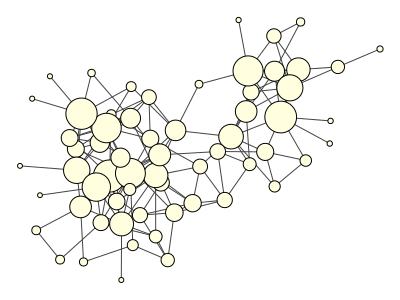

In [33]:
dolphins.vs["size"]=[v*1000 for v in dolphins.pagerank()]
random.seed(35)
plot(dolphins, bbox=(400,300), vertex_color="Light Yellow", vertex_label=None)

# Selecting Based on Attributes
Often times, we'll want to select a vertex or an edge based on a specific property: name, degree, width, etc. Luckily, igraph has built in a `select()` method to simplify this process. For commonly used comparisons, such as selecting by equivalent name, size less than or equal to some number, and a vertex/edge _not_ having a certain property, igraph has specific arguments pre-determined. For equivalent name, I would simply use `name_eq` as my argument. This applies to any attribute when looking for equivalence - simply append `_eq` to the attribute name. Greater than, less than, and not equal are `_gt`, `_lt`, and `_ne`, respectively. A list of all arguments of such type is available here: http://igraph.org/python/doc/tutorial/tutorial.html#selecting-vertices-and-edges

To begin, let's look at our example graph from earlier. Let's say I wanted to select the 'B' vertex.

In [47]:
ep.vs.select(name_eq ='B')

Alternatively, let's say I wanted to select all of the orange edges from the graph.

In [49]:
ep.es.select(color_eq = 'Orange')

Notice that in both of these cases, an igraph object of some sort is returned. To see the actual edges returned, we can examine our edge sequence with list comprehension.

In [51]:
[e for e in ep.es.select(color_eq = 'Orange')]

[igraph.Edge(<igraph.Graph object at 0x000001C5A6FA9C78>, 1, {'color': 'Orange'}),
 igraph.Edge(<igraph.Graph object at 0x000001C5A6FA9C78>, 5, {'color': 'Orange'}),
 igraph.Edge(<igraph.Graph object at 0x000001C5A6FA9C78>, 6, {'color': 'Orange'})]

## Exercise: Selecting Nodes

The last time we altered the `size` attribute of the dolphin dataset, we were looking at pagerank. For practice, select all nodes in the dolphin network whose size is greater than 30. Then, print these nodes.

# Shortest Path Calculations
There are a number of methods of calculating the shortest path between two (or more) vertices. In computer science, this is often referred to as the "traveling salesman problem" and is considered NP-hard. `igraph` has built-in methods for finding the shortest path. The (arguably) most popular of these methods is Dijkstra's algorithm (see Appendix for more information and the mathematical formulas).

### Example

The `shortest_paths_dijkstra` method takes in a source and a target, both of which are (lists of) nodes to be considered when calculating the shortest path lengths. Consider the karate club network we looked at earlier. If I want to know the shortest path length (or number of people/connections) from person 5 to person 8, I can pass those in as sources and targets. The function will return the shortest path length for the given vertices in a list of lists.

In [34]:
karate.shortest_paths_dijkstra(5, 29)

[[4]]

From there, if we want to know the list of edges for that shortest path, we can call the `get_shortest_paths` method and pass in "epath" as the `output` argument. This tells igraph to supply the edge path instead of the vertex path ("vpath") when finding the shortest path

In [35]:
karate.get_shortest_paths(5, 29, output="epath")

[[7, 1, 50, 58]]

Alternatively, if we wanted to know the actual vertices we'd have to cross through to follow those edges, we can use the method `get_all_shortest_paths` and receive a list of all the different paths we could take. For instance, in our karate graph, we can look at the shortest paths from 5 to 29. We know that the length will be four, but there may be more than one four-edge path to get from 5 to 29. Hence, if we ask for all the shortest paths, more than one list may be returned.

In [36]:
karate.get_all_shortest_paths(5, 29)

[[5, 0, 8, 33, 29],
 [5, 0, 13, 33, 29],
 [5, 0, 19, 33, 29],
 [5, 0, 31, 33, 29],
 [5, 0, 2, 32, 29],
 [5, 0, 8, 32, 29],
 [5, 0, 31, 32, 29]]

We can also get _all_ shortest paths from one node to all other nodes. So, in our karate graph we can look at all the shortest paths from person 5 to everyone else they have a path to.

In [37]:
karate.get_all_shortest_paths(5)

[[5, 0],
 [5, 0, 1],
 [5, 0, 2],
 [5, 0, 3],
 [5, 10, 4],
 [5, 6, 4],
 [5, 0, 4],
 [5],
 [5, 6],
 [5, 0, 7],
 [5, 0, 8],
 [5, 0, 2, 9],
 [5, 10],
 [5, 0, 11],
 [5, 0, 12],
 [5, 0, 13],
 [5, 0, 8, 33, 14],
 [5, 0, 13, 33, 14],
 [5, 0, 19, 33, 14],
 [5, 0, 31, 33, 14],
 [5, 0, 2, 32, 14],
 [5, 0, 8, 32, 14],
 [5, 0, 31, 32, 14],
 [5, 0, 8, 33, 15],
 [5, 0, 13, 33, 15],
 [5, 0, 19, 33, 15],
 [5, 0, 31, 33, 15],
 [5, 0, 2, 32, 15],
 [5, 0, 8, 32, 15],
 [5, 0, 31, 32, 15],
 [5, 16],
 [5, 0, 17],
 [5, 0, 8, 33, 18],
 [5, 0, 13, 33, 18],
 [5, 0, 19, 33, 18],
 [5, 0, 31, 33, 18],
 [5, 0, 2, 32, 18],
 [5, 0, 8, 32, 18],
 [5, 0, 31, 32, 18],
 [5, 0, 19],
 [5, 0, 8, 33, 20],
 [5, 0, 13, 33, 20],
 [5, 0, 19, 33, 20],
 [5, 0, 31, 33, 20],
 [5, 0, 2, 32, 20],
 [5, 0, 8, 32, 20],
 [5, 0, 31, 32, 20],
 [5, 0, 21],
 [5, 0, 8, 33, 22],
 [5, 0, 13, 33, 22],
 [5, 0, 19, 33, 22],
 [5, 0, 31, 33, 22],
 [5, 0, 2, 32, 22],
 [5, 0, 8, 32, 22],
 [5, 0, 31, 32, 22],
 [5, 0, 31, 25, 23],
 [5, 0, 8, 33, 23],
 [5, 

# Community Detection

Community detection is exactly what it sounds like: finding clusters of nodes (communities) that are densly connected to one another, or at least more densly connected to one another than to the rest of the graph. This is especially common in social network analysis, as it can indicate where friend groups lie, what brings them together (by looking at their attributes), and how they differ from the rest of the graph. It can highlight communities and clusters that otherwise wouldn't be apparent.

### Infomap Community Detection

`igraph` describes the InfoMap algorithm as finding the community structure that minimizes the expected description length of a random walker trajectory. In other words, it builds communities based on which sub-graphs and clusters would minimize the expected length of any random path or walk.

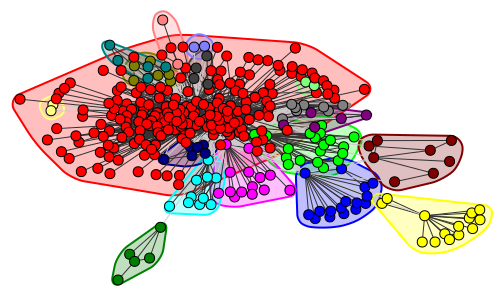

In [38]:
random.seed(50)
us_air=Graph.Read_Ncol("inf-USAir97/inf-USAir97.mtx", directed=False) #note - delete beginning of file & cite here
comms = us_air.community_infomap()
plot(comms, mark_groups=True, vertex_label=None, vertex_size=10, arrow_head_width=2, bbox=(500,300))

If we look at the `comms.membership`, we can see the community that each vertex belongs to. Just in case we want to save this when we export the graph, we'll add membership as an attribute to our original graph.

In [39]:
us_air.vs()['membership'] = comms.membership
comms.membership #concat to range of like 25 or so

[2,
 2,
 2,
 2,
 2,
 2,
 7,
 1,
 3,
 3,
 3,
 7,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 4,
 0,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 7,
 7,
 7,
 7,
 7,
 7,
 1,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 6,
 11,
 1,
 1,
 1,
 1,
 1,
 1,
 11,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 10,
 10,
 10,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 10,
 0,
 0,
 0,
 11,
 0,
 0,
 13,
 0,
 11,
 11,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 17,
 17,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 13,
 13,
 12,
 12,
 12,
 14,
 12,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 0,
 4,
 4,
 13,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

### Edge Betweenness and Clustering

Earlier, we looked at edge betweeennness as a measure of centrality. Remember that when you calcuate betweenness centrality, you tend to end up with a few edges having really high values - these are the ones that are responsible for many connections in the graph, and often bridge smaller sub-graphs together. The Girvan-Newman algorithm (for edge-betweenness community detection)works by removing thesee high-valued edges to separate these smaller groups and thus reveal the underlying graph structure. It loops through the following steps:
1. The betweenness of all existing edges in the network is calculated first.
2. The edge with the highest betweenness is removed. 
3. The betweenness of all edges affected by the removal is recalculated.
4. Steps 2 and 3 are repeated until no edges remain.

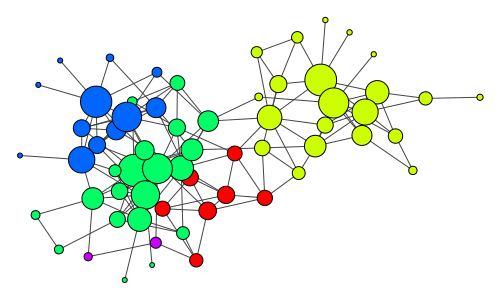

In [40]:
random.seed(50)
g = dolphins
c_edges = g.community_edge_betweenness()
clusters = c_edges.as_clustering()
members = clusters.membership
colors = RainbowPalette(n=int(max(members) + 1))
g.vs["color"] = [(colors.get(i)) for i in members]
plot(g, bbox=(500,300), vertex_label=None)

## Exercise

Perform community detection on the `friend` network from earlier and graph your findings. What community group does node 17 belong to?

In [79]:
g = friend
edgs = friend.community_edge_betweenness()
clusters = edgs.as_clustering()
members = clusters.membership
g.vs['color'] = [(colors.get(i)) for i in members]
plot(g)
g.vs()[17]

igraph.Vertex(<igraph.Graph object at 0x000001C5A6FA9E58>, 17, {'membership': 2, 'name': 63, 'color': (1.0, 1.0, 0.0, 1.0)})

# Subgraphs and Components

Sometimes, we want to access just a section of a much larger graph, or a __subgraph__. Let's revisit the `dolphins` dataset, and use igraph to pull out a subgraph of 30 vertices (in this case, dolphins). As visible below, igraph automatically keeps all connections and properties from the original graph.

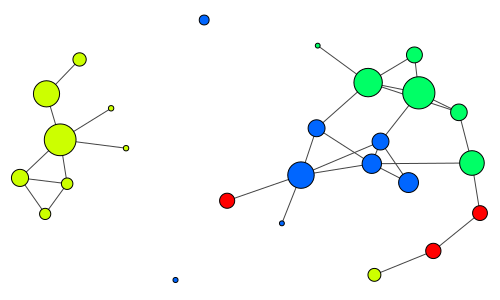

In [41]:
random.seed(58)
d_sub = dolphins.subgraph(vertices=range(10,36))
plot(d_sub, bbox=(500,300), vertex_label=None)

Next, let's find the largest __connected component__: a special type of subgraph whose vertices are all connected by paths and share no edges/paths with the rest of the supergraph. In this subgraph, it's visually evident that the right-most component is the largest. By calling the `clusters` method, we can examine all the different components of this subgraph. Then, igraph can detect the largest one using the `giant` function call.

In [42]:
[c for c in d_sub.clusters()]

[[0, 2, 4, 5, 6, 8, 9, 10, 11, 14, 18, 19, 20, 23, 24, 25],
 [1],
 [3, 7, 12, 15, 16, 17, 21, 22],
 [13]]

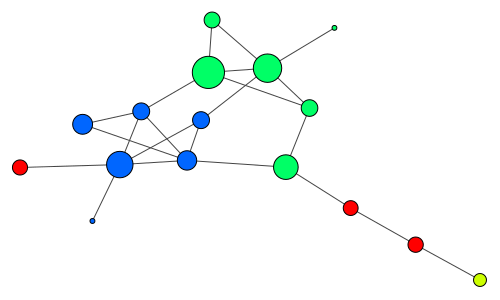

In [43]:
random.seed(58)
d_max = d_sub.clusters().giant()
plot(d_max, bbox=(500,300), vertex_label=None)

# Adjacency Matrices

An adjanceny matrix is a square (n by n) matrix used to represent nodess and edges in a network graph. For unweighted, undirected networks, the values in the matrix are all either 0 or 1, where 1 represents an edge existing between the two vertices and a 0 representing no edge. In simple graphs, the diagonal is filled with 0's, meaning that no vertex is connected to itself. A vertex connected to itself is called a _loop_.

Let's look at an adjacency matrix of our example graph from earlier:

In [45]:
mat = ep.get_adjacency()
print(mat)

[[0, 0, 1, 1, 0, 1]
 [0, 0, 0, 0, 1, 0]
 [1, 0, 0, 1, 1, 0]
 [1, 0, 1, 0, 0, 0]
 [0, 1, 1, 0, 0, 1]
 [1, 0, 0, 0, 1, 0]]


We see that this graph is not self-connected, since the diagonal contains all 0's.

From here, we often want to save the adjacency matrix so we can work with it in other frameworks. We could easily convert it to a numpy array by running ```mat_np = np.array(mat.data) ```, or we can save the matrix to our computer for later use:

In [46]:
ep.write_adjacency("exp_adj.txt")

# File Output

Usually, when we create a graph in igraph, we want to save it and work with it later, or pass it along to someone else, or include it in a final report. Whatever the case, there are a variety of formats that network graphs can be saved in. GML, EdgeList, and NCOL are some of the most common recommended filetypes. A list of different types and what information they store is available here: https://gephi.org/users/supported-graph-formats/

Here, we'll save our sorority graph as a GML and our example graph as an edgelist.

In [67]:
srat.save("srat.gml")
ep.save("ep", format="edgelist")

# NetworkX vs. igraph

When looking to explore network analysis for the first time, it's common to work with the `NetworkX` package for python. `igraph` has a steeper learning curve and is a little less user friendly; however, when working with large datasets (especially for community detection), the computational speed of `igraph` far surpasses that of `NetworkX`.

https://yoyoinwanderland.github.io/2017/08/08/Community-Detection-in-Python/



# Sources and More Information

For official python igraph documation:
http://igraph.org/python/#docs

For an additional tutorial:
http://igraph.org/python/doc/tutorial/tutorial.html

Southern Women Dataset:
Davis, A., Gardner, B. B., Gardner, M. R., 1941. Deep South. University of Chicago Press, Chicago, IL.

